In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


# カスタマイズ

## テンソルとオペレーション

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 4.3MB 46.0MB/s 
     |████████████████████████████████| 501kB 48.1MB/s 


In [0]:
import tensorflow as tf

In [0]:
print(tf.add(1,2))
print(tf.add([1,2], [3,4]))
print(tf.square(5))
print(tf.reduce_sum([1,2,3]))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)


In [0]:
print(tf.square(2)+tf.square(3))

tf.Tensor(13, shape=(), dtype=int32)


In [0]:
x = tf.matmul([[1]], [[2,3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


In [0]:
import numpy as np

ndarray = np.ones([3,3])

tensor = tf.multiply(ndarray, 42)
print(tensor)

print(np.add(tensor, 1))

print(tensor.numpy())

tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


In [0]:
x = tf.random.uniform([3, 3])

print("利用できるGPUはあるか: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("テンソルはGPU #0にあるか:  "),
print(x.device.endswith('GPU:0'))

利用できるGPUはあるか: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
テンソルはGPU #0にあるか:  
True


In [0]:
import time

def time_matmul(x):
    start = time.time()
    for loop in range(10):
        tf.matmul(x, x)

    result = time.time() - start

    print('10 loops: {:0.2f}ms'.format(1000*result))

print('On CPU')
with tf.device('CPU:0'):
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith('CPU:0')
    time_matmul(x)

if tf.config.experimental.list_physical_devices('GPU'):
    print('On GPU')
    with tf.device('GPU:0'):
        x = tf.random.uniform([1000, 1000])
        assert x.device.endswith('GPU:0')
        time_matmul(x)

On CPU
10 loops: 175.92ms
On GPU
10 loops: 1237.51ms


In [0]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1,2,3,4,5,6])

import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
    f.write("""Line 1
    Line 2
    Line 3
    """)

ds_file = tf.data.TextLineDataset(filename)

In [0]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)

In [0]:
for x in ds_tensors:
    print(x)

for x in ds_file:
    print(x)

tf.Tensor([4 9], shape=(2,), dtype=int32)
tf.Tensor([16 25], shape=(2,), dtype=int32)
tf.Tensor([36  1], shape=(2,), dtype=int32)
tf.Tensor([b'Line 1' b'    Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'    Line 3' b'    '], shape=(2,), dtype=string)


## カスタムレイヤー

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [0]:
# layer = tf.keras.layers.Dense(100)

layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

In [0]:
layer(tf.zeros([10, 5]))

<tf.Tensor: id=145, shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [0]:
layer.variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.05027223, -0.1462014 , -0.33824736, -0.22941211, -0.4866753 ,
          0.15201402,  0.32855284,  0.40385884, -0.4066378 , -0.6288381 ],
        [-0.49714005, -0.1627683 , -0.05282021,  0.40930218, -0.23053744,
          0.17984319,  0.10674244,  0.428564  , -0.07596141,  0.36635685],
        [ 0.01511389, -0.1625587 , -0.10019922, -0.01692611, -0.07042831,
         -0.03746867,  0.0264923 , -0.39486355, -0.32443824, -0.29024574],
        [ 0.27903426,  0.35152584, -0.5267341 , -0.25040635,  0.04935116,
         -0.58806396,  0.05747753, -0.5025535 ,  0.16827554, -0.22688639],
        [ 0.41513175, -0.2693159 , -0.58534735,  0.14437968, -0.42712355,
         -0.32348222,  0.01167923, -0.61129194,  0.36693394, -0.31395748]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [0]:
layer.kernel, layer.bias

(<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.05027223, -0.1462014 , -0.33824736, -0.22941211, -0.4866753 ,
          0.15201402,  0.32855284,  0.40385884, -0.4066378 , -0.6288381 ],
        [-0.49714005, -0.1627683 , -0.05282021,  0.40930218, -0.23053744,
          0.17984319,  0.10674244,  0.428564  , -0.07596141,  0.36635685],
        [ 0.01511389, -0.1625587 , -0.10019922, -0.01692611, -0.07042831,
         -0.03746867,  0.0264923 , -0.39486355, -0.32443824, -0.29024574],
        [ 0.27903426,  0.35152584, -0.5267341 , -0.25040635,  0.04935116,
         -0.58806396,  0.05747753, -0.5025535 ,  0.16827554, -0.22688639],
        [ 0.41513175, -0.2693159 , -0.58534735,  0.14437968, -0.42712355,
         -0.32348222,  0.01167923, -0.61129194,  0.36693394, -0.31395748]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [0]:
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDenseLayer, self).__init__()
        self.num_outputs = num_outputs
    
    def build(self, input_shape):
        self.kernel = self.add_variable('kernel',
                                        shape=[int(input_shape[-1]), self.num_outputs])
    
    def call(self, input):
        return tf.matmul(input, self.kernel)

layer = MyDenseLayer(10)
print(layer(tf.zeros([10, 5])))
print(layer.trainable_variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.50683147,  0.4324643 , -0.29532355,  0.63031   , -0.4111319 ,
        -0.17382899,  0.50736505, -0.1934394 ,  0.6273543 ,  0.47094256],
       [-0.11783117, -0.33103466,  0.38930064,  0.62831384,  0.5368002 ,
         0.03232288,  0.56980795,  0.57349175,  0.38845724, -0.31450832],
       [ 0.60467535, -0.1609635 ,  0.15943646, -0.22818121,  0.53388125,
        -0.06061757,  0.06540573, -0.1939607 , -0.05365759,  0.3321451 ],
       [-0.3314145 , -0.33637607, -0.25099367,  0.07394743,  0.51247317,
        -0.01820552, -0.17168611, 

In [0]:
class ResnetIdentityBlock(tf.keras.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filters1, filters2, filters3 = filters

        self.conv2a = tf.keras.layers.Conv2D(filters1, (1,1))
        self.bn2a = tf.keras.layers.BatchNormalization()

        self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
        self.bn2b = tf.keras.layers.BatchNormalization()

        self.conv2c = tf.keras.layers.Conv2D(filters3, (1,1))
        self.bn2c = tf.keras.layers.BatchNormalization()
    
    def call(self, input_tensor, training=False):
        # print(input_tensor.shape)
        x = self.conv2a(input_tensor)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        # print(x.shape)
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)
        # print(x.shape)
        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        # print(x.shape)
        x += input_tensor
        # print(x.shape)
        return tf.nn.relu(x)

block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1,2,3,3])))
print([x.name for x in block.trainable_variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block_4/conv2d_12/kernel:0', 'resnet_identity_block_4/conv2d_12/bias:0', 'resnet_identity_block_4/batch_normalization_12/gamma:0', 'resnet_identity_block_4/batch_normalization_12/beta:0', 'resnet_identity_block_4/conv2d_13/kernel:0', 'resnet_identity_block_4/conv2d_13/bias:0', 'resnet_identity_block_4/batch_normalization_13/gamma:0', 'resnet_identity_block_4/batch_normalization_13/beta:0', 'resnet_identity_block_4/conv2d_14/kernel:0', 'resnet_identity_block_4/conv2d_14/bias:0', 'resnet_identity_block_4/batch_normalization_14/gamma:0', 'resnet_identity_block_4/batch_normalization_14/beta:0']


In [0]:
my_seq = tf.keras.Sequential([tf.keras.layers.Conv2D(1, (1,1), input_shape=(None, None, 3)),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Conv2D(2, 1, padding='same'),
                              tf.keras.layers.BatchNormalization(),
                              tf.keras.layers.Conv2D(3, (1,1)),
                              tf.keras.layers.BatchNormalization()])
my_seq(tf.zeros([1,2,3,3]))

<tf.Tensor: id=1832, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

## 自動微分と勾配テープ

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [0]:
x = tf.ones((2,2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

dz_dx = t.gradient(z, x)
for i in [0,1]:
    for j in [0,1]:
        assert dz_dx[i][j].numpy() == 8.0

In [0]:
x = tf.ones((2,2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

dz_dy = t.gradient(z, y)
assert dz_dy.numpy() == 8.0

In [0]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
  t.watch(x)
  y = x * x
  z = y * y
dz_dx = t.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = t.gradient(y, x)  # 6.0
del t  # テープへの参照を削除

In [0]:
def f(x, y):
    output = 1.0
    for i in range(y):
        if i > 1 and i < 5:
            output = tf.multiply(output, x)
    return output

def grad(x, y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x, y)
    return t.gradient(out, x)

x = tf.convert_to_tensor(2.0)

assert grad(x, 6).numpy() == 12.0
assert grad(x, 5).numpy() == 12.0
assert grad(x, 4).numpy() == 4.0

In [0]:
x = tf.Variable(1.0)  # 1.0 で初期化された TensorFlow 変数を作成

with tf.GradientTape() as t:
  with tf.GradientTape() as t2:
    y = x * x * x
  # ’t’ コンテキストマネジャー内で勾配を計算
  # これは勾配計算も同様に微分可能であるということ
  dy_dx = t2.gradient(y, x)
d2y_dx2 = t.gradient(dy_dx, x)

assert dy_dx.numpy() == 3.0
assert d2y_dx2.numpy() == 6.0

## カスタムトレーニング

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [0]:
class Model(object):
    def __init__(self):
        self.W = tf.Variable(5.0)
        self.b = tf.Variable(0.0)

    def __call__(self, x):
        return self.W * x + self.b
    
model = Model()

assert model(3.0).numpy() == 15.0

In [0]:
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

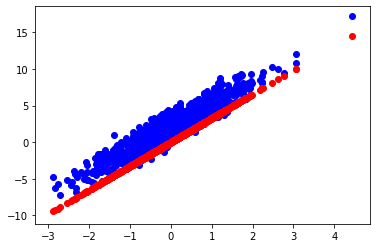

Current loss: 5.200110


In [0]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [0]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.81840
Epoch  1: W=4.63 b=0.41, loss=6.05231
Epoch  2: W=4.33 b=0.74, loss=4.26782
Epoch  3: W=4.08 b=1.00, loss=3.11624
Epoch  4: W=3.89 b=1.21, loss=2.37286
Epoch  5: W=3.73 b=1.37, loss=1.89284
Epoch  6: W=3.59 b=1.51, loss=1.58277
Epoch  7: W=3.49 b=1.61, loss=1.38242
Epoch  8: W=3.40 b=1.69, loss=1.25292
Epoch  9: W=3.33 b=1.76, loss=1.16918


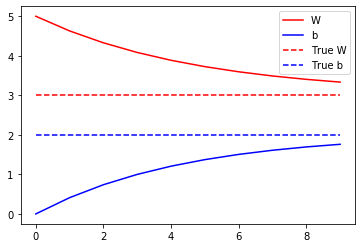

In [0]:
model = Model()

Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(model(inputs), outputs)

    train(model, inputs, outputs, learning_rate=0.1)
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' % (epoch, Ws[-1], bs[-1], current_loss))

plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()

## ウォークスルー

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
print('TensorFlow version: {}'.format(tf.__version__))
print('Eager execution: {}'.format(tf.executing_eagerly()))

TensorFlow version: 2.1.0-rc1
Eager execution: True


In [0]:
train_dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv'

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print('Local copy of the dataset file: {}'.format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [0]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [0]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print('Features: {}'.format(feature_names))
print('Label: {}'.format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [0]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [0]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1
)

In [0]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([7.2, 5.4, 5.5, 5.8, 6.5, 5.7, 6.9, 4.6, 5.2, 5.7, 6.4, 7.2, 5. ,
       5. , 4.6, 6.1, 6.3, 5.5, 5.5, 6.3, 7.7, 6. , 7.7, 4.7, 7. , 6.9,
       6. , 4.8, 4.6, 6.1, 6.5, 6.5], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.2, 3.4, 3.5, 2.7, 3. , 3.8, 3.1, 3.1, 3.5, 2.8, 3.2, 3.6, 3.6,
       3.5, 3.2, 2.8, 3.3, 2.4, 2.6, 2.3, 2.8, 2.7, 3. , 3.2, 3.2, 3.2,
       2.9, 3. , 3.6, 2.6, 3. , 2.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6. , 1.5, 1.3, 5.1, 5.8, 1.7, 4.9, 1.5, 1.5, 4.5, 5.3, 6.1, 1.4,
       1.3, 1.4, 4.7, 6. , 3.8, 4.4, 4.4, 6.7, 5.1, 6.1, 1.6, 4.7, 5.7,
       4.5, 1.4, 1. , 5.6, 5.2, 4.6], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.8, 0.4, 0.2, 1.9, 2.2, 0.3, 1.5, 0.2, 0.2, 1.3, 2.3, 2.5, 0.2,
       0.3, 0.2, 1.2, 2.5, 1.1, 1.2, 1.3, 2. , 1.6, 2.3, 0.2,

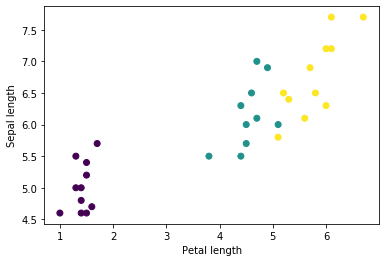

In [0]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.show()

In [0]:
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [0]:
train_dataset = train_dataset.map(pack_features_vector)

In [0]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.7 3.2 1.6 0.2]
 [6.8 3.2 5.9 2.3]
 [4.4 2.9 1.4 0.2]
 [6.5 3.  5.5 1.8]
 [7.2 3.2 6.  1.8]], shape=(5, 4), dtype=float32)


In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)), 
                             tf.keras.layers.Dense(10, activation=tf.nn.relu),
                             tf.keras.layers.Dense(3)
])

In [0]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-0.46455717, -4.3021193 ,  2.6199784 ],
       [-0.08183596, -4.6611934 ,  3.302103  ],
       [-0.45531473, -3.9810739 ,  2.4061415 ],
       [ 0.02323069, -4.6476936 ,  3.3450425 ],
       [ 0.07685662, -5.2043076 ,  3.7624538 ]], dtype=float32)>

In [0]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[4.3708466e-02, 9.4174559e-04, 9.5534974e-01],
       [3.2790162e-02, 3.3647584e-04, 9.6687341e-01],
       [5.4006174e-02, 1.5893717e-03, 9.4440442e-01],
       [3.4819096e-02, 3.2603249e-04, 9.6485484e-01],
       [2.4465421e-02, 1.2444350e-04, 9.7541010e-01]], dtype=float32)>

In [0]:
print('Prediction: {}'.format(tf.argmax(predictions, axis=1)))
print('   Labesls: {}'.format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
   Labesls: [0 2 0 2 2 2 0 2 0 0 1 1 0 2 0 1 0 0 0 1 1 2 1 2 0 0 0 0 1 1 1 1]


In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [0]:
def loss(model, x, y):
    y_ = model(x)

    return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels)
print('Loss test: {}'.format(l))

Loss test: 3.7734930515289307


In [0]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [0]:
loss_value, grads = grad(model, features, labels)

print('Step: {}, Initial Loss: {}'.format(optimizer.iterations.numpy(), loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print('Step: {},         Loss: {}'.format(optimizer.iterations.numpy(), loss(model, features, labels).numpy()))

Step: 1, Initial Loss: 3.2737796306610107
Step: 2,         Loss: 2.821397066116333


In [0]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    for x, y in train_dataset:
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        epoch_loss_avg(loss_value)

        epoch_accuracy(y, model(x))

    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print('Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}'.format(epoch, 
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 1.145, Accuracy: 69.167%
Epoch 050: Loss: 0.061, Accuracy: 97.500%
Epoch 100: Loss: 0.119, Accuracy: 95.000%
Epoch 150: Loss: 0.049, Accuracy: 98.333%
Epoch 200: Loss: 0.044, Accuracy: 99.167%


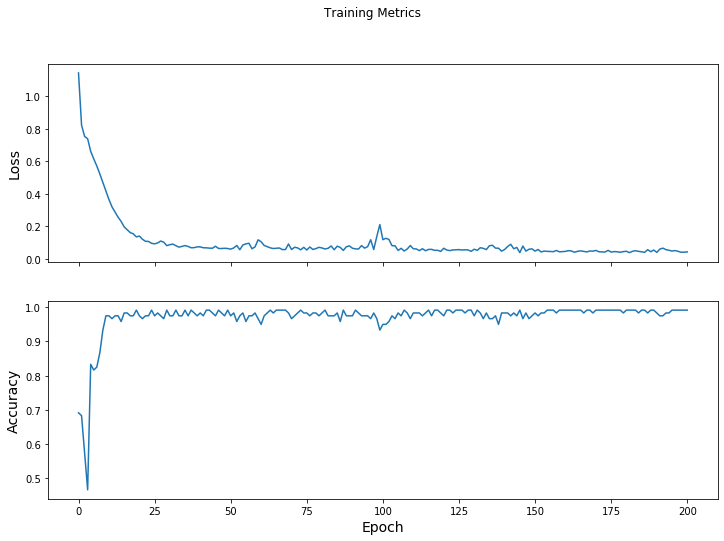

In [0]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12,8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel('Loss', fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel('Accuracy', fontsize=14)
axes[1].set_xlabel('Epoch', fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [0]:
test_url = 'https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv'

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url), origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [0]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names = column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False
)

test_dataset = test_dataset.map(pack_features_vector)

In [0]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x,y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print('Test set accuracy: {:.3%}'.format(test_accuracy.result()))

Test set accuracy: 96.667%


In [0]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [0]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (99.9%)
Example 1 prediction: Iris versicolor (99.9%)
Example 2 prediction: Iris virginica (99.5%)


## tf.functionで性能アップ

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

In [0]:
import contextlib

@contextlib.contextmanager
def assert_raises(error_class):
    try:
        yield
    except error_class as e:
        print('Caught expected exception \n {}: {}'.format(error_class, e))
    except Exception as e:
        print('Got unexpected exception \n {}: {}'.format(type(e), e))
    else:
        raise Exception('Excepted {} to be raised but no error was raised!'.format(error_class))

In [0]:
@tf.function
def add(a, b):
    return a + b 

add(tf.ones([2,2]), tf.ones([2,2]))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [0]:
@tf.function
def add(a,b):
    return a + b

v = tf.Variable(1.0)
with tf.GradientTape() as tape:
    result = add(v, 1.0)
tape.gradient(result, v)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [0]:
@tf.function
def dense_layer(x, w, b):
    return add(tf.matmul(x, w), b)

dense_layer(tf.ones([3,2]), tf.ones([2,2]), tf.ones([2]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[3., 3.],
       [3., 3.],
       [3., 3.]], dtype=float32)>

In [0]:
@tf.function
def double(a):
    print('Tracing with', a)
    return a + a

In [0]:
print(double(tf.constant(1)))
print()
print(double(tf.constant(1.1)))
print()
print(double(tf.constant('a')))
print()

Tracing with Tensor("a:0", shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)

Tracing with Tensor("a:0", shape=(), dtype=float32)
tf.Tensor(2.2, shape=(), dtype=float32)

Tracing with Tensor("a:0", shape=(), dtype=string)
tf.Tensor(b'aa', shape=(), dtype=string)



In [0]:
print('Obtaining concreate trace')
double_strings = double.get_concrete_function(tf.TensorSpec(shape=None, dtype=tf.string))
print('Executing traced function')
print(double_strings(tf.constant('a')))
print(double_strings(a=tf.constant('b')))
print('Using a concrete trace with incompatible types will throw an error')
with assert_raises(tf.errors.InvalidArgumentError):
    double_strings(tf.constant(1))

Obtaining concreate trace
Executing traced function
tf.Tensor(b'aa', shape=(), dtype=string)
tf.Tensor(b'bb', shape=(), dtype=string)
Using a concrete trace with incompatible types will throw an error
Caught expected exception 
 <class 'tensorflow.python.framework.errors_impl.InvalidArgumentError'>: cannot compute __inference_double_116698 as input #0(zero-based) was expected to be a string tensor but is a int32 tensor [Op:__inference_double_116698]


# 分散トレーニング

## Kerasによる分散トレーニング

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
    !pip install -q tf-nightly
except Exception:
    pass

import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()

import os

     |████████████████████████████████| 449.5MB 37kB/s 
     |████████████████████████████████| 460kB 32.5MB/s 
     |████████████████████████████████| 3.9MB 45.7MB/s 
ERROR: tensorflow-federated 0.11.0 requires enum34~=1.1, which is not installed.
ERROR: tensorflow 2.1.0rc1 has requirement gast==0.2.2, but you'll have gast 0.3.2 which is incompatible.
ERROR: tensorflow-federated 0.11.0 has requirement attrs~=18.2, but you'll have attrs 19.3.0 which is incompatible.
ERROR: tensorflow-federated 0.11.0 has requirement cachetools~=3.1.1, but you'll have cachetools 4.0.0 which is incompatible.
ERROR: tensorflow-federated 0.11.0 has requirement grpcio~=1.24.3, but you'll have grpcio 1.26.0 which is incompatible.
ERROR: tensorflow-federated 0.11.0 has requirement portpicker~=1.3.1, but you'll have portpicker 1.2.0 which is incompatible.
ERROR: tensorflow-federated 0.11.0 has requirement tensorflow~=2.0.0, but you'll have tensorflow 2.1.0rc1 which is incompatible.


In [0]:
print(tf.__version__)

2.1.0-rc1


In [0]:
datasets, info = tfds.load(name='mnist', with_info=True, as_supervised=True)

mnist_train, mnist_test = datasets['train'], datasets['test']

In [0]:
strategy = tf.distribute.MirroredStrategy()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [0]:
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

Number of devices: 1


In [0]:
num_train_examples = info.splits['train'].num_examples
num_test_examples = info.splits['test'].num_examples

In [0]:
BUFFER_SIZE = 10000

BATCH_SIZE_PER_REPLICA = 64
BATCH_SIZE = BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync

In [0]:
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255

    return image, label

In [0]:
train_dataset = mnist_train.map(scale).cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
eval_dataset = mnist_test.map(scale).batch(BATCH_SIZE)

In [0]:
with strategy.scope():
    model = tf.keras.Sequential([
                                 tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
                                 tf.keras.layers.MaxPooling2D(),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(64, activation='relu'),
                                 tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


In [0]:
checkpoint_dir = './training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

In [0]:
def decay(epoch):
    if epoch < 3:
        return 1e-3
    elif epoch >= 3 and epoch < 7:
        return 1e-4
    else:
        return 1e-5

In [0]:
class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('\nLearning rate for epoch {} is {}'.format(epoch + 1, model.optimizer.lr.numpy()))

In [0]:
callbacks = [
             tf.keras.callbacks.TensorBoard(log_dir='./logs'),
             tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,
                                                save_weights_only=True),
             tf.keras.callbacks.LearningRateScheduler(decay),
             PrintLR()
]

In [0]:
model.fit(train_dataset, epochs=12, callbacks=callbacks)

Epoch 1/12
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


    938/Unknown - 24s 25ms/step - loss: 0.2041 - accuracy: 0.9415
Learning rate for epoch 1 is 0.0010000000474974513
938/938 [==============================] - 24s 25ms/step - loss: 0.2041 - accuracy: 0.9415
Epoch 2/12
937/938 [============================>.] - ETA: 0s - loss: 0.0703 - accuracy: 0.9790
Learning rate for epoch 2 is 0.0010000000474974513
938/938 [==============================] - 6s 7ms/step - loss: 0.0702 - accuracy: 0.9790
Epoch 3/12
934/938 [============================>.] - ETA: 0s - loss: 0.0490 - accuracy: 0.9854
Learning rate for epoch 3 is 0.0010000000474974513
938/938 [==============================] - 6s 7ms/step - loss: 0.0488 - accuracy: 0.9854
Epoch 4/12
933/938 [============================>.] - ETA: 0s - loss: 0.0269 - accuracy: 0.9931
Learning rate for epoch 4 is 9.999999747378752e-05
938/938 [==============================] - 6s 7ms/step - loss: 0.0272 - accuracy: 0.9931
Epoch 5/12
933/938 [============================>.] - ETA: 0s - loss: 0.0236 - accur

In [0]:
!ls {checkpoint_dir}

checkpoint		     ckpt_4.data-00000-of-00002
ckpt_10.data-00000-of-00002  ckpt_4.data-00001-of-00002
ckpt_10.data-00001-of-00002  ckpt_4.index
ckpt_10.index		     ckpt_5.data-00000-of-00002
ckpt_11.data-00000-of-00002  ckpt_5.data-00001-of-00002
ckpt_11.data-00001-of-00002  ckpt_5.index
ckpt_11.index		     ckpt_6.data-00000-of-00002
ckpt_12.data-00000-of-00002  ckpt_6.data-00001-of-00002
ckpt_12.data-00001-of-00002  ckpt_6.index
ckpt_12.index		     ckpt_7.data-00000-of-00002
ckpt_1.data-00000-of-00002   ckpt_7.data-00001-of-00002
ckpt_1.data-00001-of-00002   ckpt_7.index
ckpt_1.index		     ckpt_8.data-00000-of-00002
ckpt_2.data-00000-of-00002   ckpt_8.data-00001-of-00002
ckpt_2.data-00001-of-00002   ckpt_8.index
ckpt_2.index		     ckpt_9.data-00000-of-00002
ckpt_3.data-00000-of-00002   ckpt_9.data-00001-of-00002
ckpt_3.data-00001-of-00002   ckpt_9.index
ckpt_3.index


In [0]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

eval_loss, eval_acc = model.evaluate(eval_dataset)

print('Eval loss: {}, Eval Accuracy: {}'.format(eval_loss, eval_acc))

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).


    157/Unknown - 4s 27ms/step - loss: 0.0422 - accuracy: 0.9856Eval loss: 0.042243276990781044, Eval Accuracy: 0.9855999946594238


In [0]:
path = 'saved_model/'

model.save(path, save_format='tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [0]:
unreplicated_model = tf.keras.models.load_model(path)

unreplicated_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

eval_loss, eval_acc = unreplicated_model.evaluate(eval_dataset)

print('Eval loss: {}, Eval Accuracy: {}'.format(eval_loss, eval_acc))

    157/Unknown - 3s 18ms/step - loss: 0.0422 - accuracy: 0.9856Eval loss: 0.04224367703905827, Eval Accuracy: 0.9855999946594238


In [0]:
with strategy.scope():
    replicated_model = tf.keras.models.load_model(path)
    replicated_model.compile(loss='sparse_categorical_crossentropy',
                             optimizer=tf.keras.optimizers.Adam(),
                             metrics=['accuracy'])
    
    eval_loss, eval_acc = replicated_model.evaluate(eval_dataset)
    print('Eval loss: {}, Eval Accuracy: {}'.format(eval_loss, eval_acc))

    157/Unknown - 4s 27ms/step - loss: 0.0422 - accuracy: 0.9856Eval loss: 0.04224367703905827, Eval Accuracy: 0.9855999946594238


# Text

## Word embeddings

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [0]:
from tensorflow import keras 
from tensorflow.keras import layers

import tensorflow_datasets as tfds 
tfds.disable_progress_bar()

In [0]:
embedding_layer = layers.Embedding(1000, 5)

In [0]:
result = embedding_layer(tf.constant([1,2,3]))
result.numpy()

array([[ 0.00802495, -0.01512732,  0.04230786,  0.0054918 , -0.00929638],
       [-0.03569641,  0.03984011, -0.01530435, -0.04493967,  0.04225994],
       [ 0.0423159 , -0.0484188 ,  0.00644637,  0.02417399,  0.01230347]],
      dtype=float32)

In [0]:
result = embedding_layer(tf.constant([[0,1,2],[3,4,5]]))
result.shape

TensorShape([2, 3, 5])

In [0]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k',
                                          split = (tfds.Split.TRAIN, tfds.Split.TEST),
                                          with_info = True, as_supervised=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [0]:
padded_shapes = ([None],())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes = padded_shapes)

In [0]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[8002, 7968,  111, ...,    0,    0,    0],
       [8013, 1021,  131, ...,    0,    0,    0],
       [  12,  456,  247, ...,    0,    0,    0],
       ...,
       [  12,   52, 1358, ...,    0,    0,    0],
       [  19, 5655, 7961, ...,    0,    0,    0],
       [4027,   12, 7442, ...,    0,    0,    0]])

In [0]:
embedding_dim=16

model = keras.Sequential([
                          layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.Dense(16, activation='relu'),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
dense_7 (Dense)              (None, None, 16)          272       
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=10, 
                    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 33s 13ms/step - loss: 0.5629 - accuracy: 0.7419 - val_loss: 0.4141 - val_accuracy: 0.8850
Epoch 2/10
2500/2500 [==============================] - 24s 10ms/step - loss: 0.3325 - accuracy: 0.8860 - val_loss: 0.3325 - val_accuracy: 0.8750
Epoch 3/10
2500/2500 [==============================] - 24s 10ms/step - loss: 0.2666 - accuracy: 0.9084 - val_loss: 0.3032 - val_accuracy: 0.8600
Epoch 4/10
2500/2500 [==============================] - 24s 10ms/step - loss: 0.2336 - accuracy: 0.9218 - val_loss: 0.3767 - val_accuracy: 0.8250
Epoch 5/10
2500/2500 [==============================] - 25s 10ms/step - loss: 0.2110 - accuracy: 0.9290 - val_loss: 0.2878 - val_accuracy: 0.8700
Epoch 6/10
2500/2500 [==============================] - 25s 10ms/step - loss: 0.1938 - accuracy: 0.9369 - val_loss: 0.2750 - val_accuracy: 0.8700
Epoch 7/10
2500/2500 [==============================] - 25s 10ms/step - loss: 0.1767 - accuracy: 0.9411 - val_loss: 0.2283 -

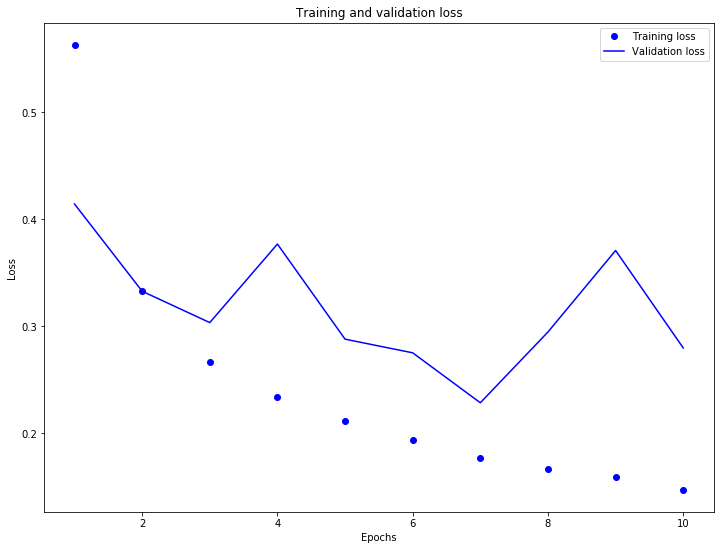

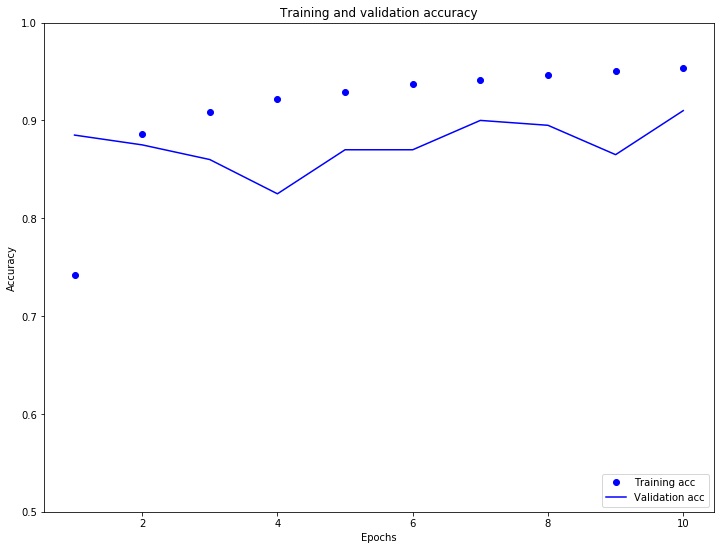

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))
plt.show()

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(8185, 16)


In [0]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
    vec = weights[num+1]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in vec]) + '\n')
out_v.close()
out_m.close()

In [0]:
import io

encoder = info.features['text'].encoder

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in enumerate(encoder.subwords):
  vec = weights[num+1] # 0 はパディングのためスキップ
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
out_v.close()
out_m.close()

## RNNを使ったテキスト分類

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [0]:
import matplotlib.pyplot as plt 

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4


In [0]:
encoder = info.features['text'].encoder

In [0]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [0]:
sample_string = 'Hello TensorFlow'
encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: {}'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120]
The original string: Hello TensorFlow


In [0]:
assert original_string == sample_string

In [0]:
for index in encoded_string:
    print('{} -----> {}'.format(index, encoder.decode([index])))

4025 -----> Hell
222 -----> o 
6307 -----> Ten
2327 -----> sor
4043 -----> Fl
2120 -----> ow


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, padded_shapes=([None],()))

test_dataset = test_dataset.padded_batch(BATCH_SIZE, padded_shapes=([None],()))

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(encoder.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_dataset, epochs=10,
                    validation_data = test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 130s 333ms/step - loss: 0.6461 - accuracy: 0.6144 - val_loss: 0.4776 - val_accuracy: 0.7828
Epoch 2/10
391/391 [==============================] - 125s 320ms/step - loss: 0.3495 - accuracy: 0.8605 - val_loss: 0.3302 - val_accuracy: 0.8719
Epoch 3/10
391/391 [==============================] - 124s 316ms/step - loss: 0.2528 - accuracy: 0.9070 - val_loss: 0.3199 - val_accuracy: 0.8776
Epoch 4/10
391/391 [==============================] - 124s 318ms/step - loss: 0.2084 - accuracy: 0.9254 - val_loss: 0.3262 - val_accuracy: 0.8760
Epoch 5/10
391/391 [==============================] - 125s 321ms/step - loss: 0.1828 - accuracy: 0.9368 - val_loss: 0.3381 - val_accuracy: 0.8818
Epoch 6/10
391/391 [==============================] - 124s 317ms/step - loss: 0.1637 - accuracy: 0.9436 - val_loss: 0.3477 - val_accuracy: 0.8646
Epoch 7/10
391/391 [==============================] - 125s 320ms/step - loss: 0.1698 - accuracy: 0.9402 - val_loss: 0.3550 -

In [0]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 45s 116ms/step - loss: 0.4408 - accuracy: 0.8556Test Loss: 0.4408326847931308
Test Accuracy: 0.8556399941444397


In [0]:
def pad_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    return vec

In [0]:
def sample_predict(sentence, pad):
    encoded_sample_pred_text = encoder.encode(sample_pred_text)

    if pad:
        encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
    encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
    predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

    return (predictions)

In [0]:
sample_pred_text = ('The movie was cool. The anivation and the prahics '
'were out of this world. I would recommend this movie.')

predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.4656237]]


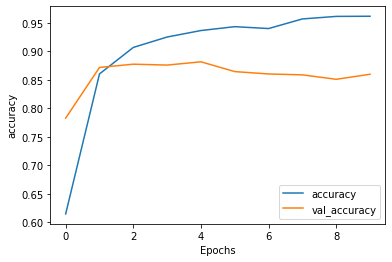

In [0]:
plot_graphs(history, 'accuracy')

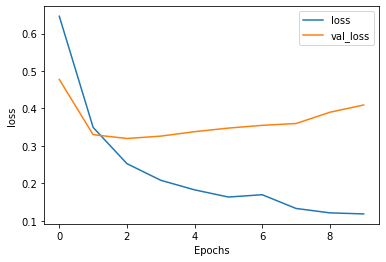

In [0]:
plot_graphs(history, 'loss')

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(encoder.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [0]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
hisotry = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 237s 607ms/step - loss: 0.6497 - accuracy: 0.5911 - val_loss: 0.4426 - val_accuracy: 0.8036
Epoch 2/10
391/391 [==============================] - 229s 585ms/step - loss: 0.3479 - accuracy: 0.8645 - val_loss: 0.3311 - val_accuracy: 0.8651
Epoch 3/10
391/391 [==============================] - 229s 586ms/step - loss: 0.2513 - accuracy: 0.9114 - val_loss: 0.3112 - val_accuracy: 0.8766
Epoch 4/10
391/391 [==============================] - 227s 581ms/step - loss: 0.2060 - accuracy: 0.9317 - val_loss: 0.3271 - val_accuracy: 0.8651
Epoch 5/10
391/391 [==============================] - 228s 583ms/step - loss: 0.1866 - accuracy: 0.9399 - val_loss: 0.3549 - val_accuracy: 0.8620
Epoch 6/10
391/391 [==============================] - 229s 586ms/step - loss: 0.1558 - accuracy: 0.9533 - val_loss: 0.4047 - val_accuracy: 0.8615
Epoch 7/10
391/391 [==============================] - 229s 585ms/step - loss: 0.1416 - accuracy: 0.9589 - val_loss: 0.4193 -

In [0]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 88s 225ms/step - loss: 0.5144 - accuracy: 0.8549Test Loss: 0.5144398362206681
Test Accuracy: 0.8549200296401978


In [0]:
sampled_pred_text = ('The movie was not good. The animation and the gaphics '
'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[0.05583975]]


In [0]:
sample_pred_text = ('The movie was not good. The animation and the graphics '
'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[0.01341614]]


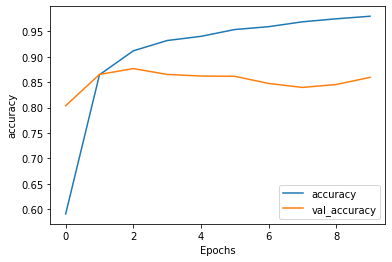

In [0]:
plot_graphs(hisotry, 'accuracy')

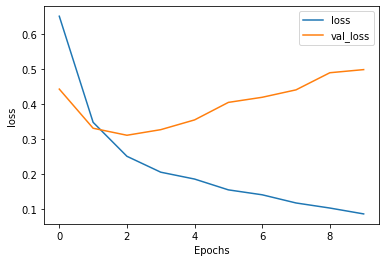

In [0]:
plot_graphs(hisotry, 'loss')

## RNNによるテキス卜生成

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import numpy as np
import os
import time

In [3]:
path_to_file = tf.keras.utils.get_file('shapespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

1122304/1115394 [==============================] - 0s 0us/step


In [4]:
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
print('Length of text: {} characters'.format(len(text)))

Length of text: 1115394 characters


In [5]:
print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [6]:
vocab = sorted(set(text))
print('{} unique characters'.format(len(vocab)))
print(vocab)

65 unique characters
['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [0]:
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in text])

In [8]:
print('{')
for char, _ in zip(char2idx, range(20)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '$' :   3,
  '&' :   4,
  "'" :   5,
  ',' :   6,
  '-' :   7,
  '.' :   8,
  '3' :   9,
  ':' :  10,
  ';' :  11,
  '?' :  12,
  'A' :  13,
  'B' :  14,
  'C' :  15,
  'D' :  16,
  'E' :  17,
  'F' :  18,
  'G' :  19,
  ...
}


In [9]:
print('{} ---- characters mapped to int ---- > {}'.format(repr(text[:13]), text_as_int[:13]))

'First Citizen' ---- characters mapped to int ---- > [18 47 56 57 58  1 15 47 58 47 64 43 52]


In [10]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

for i in char_dataset.take(5):
    print(idx2char[i.numpy()])

F
i
r
s
t


In [11]:
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

for item in sequences.take(5):
    print(repr(''.join(idx2char[item.numpy()])))

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [0]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

In [13]:
for input_example, target_example in dataset.take(1):
    print('Input data: ', repr(''.join(idx2char[input_example.numpy()])))
    print('Target data:', repr(''.join(idx2char[target_example.numpy()])))

Input data:  'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target data: 'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [14]:
for i, (input_idx, target_idx) in enumerate(zip(input_example[:5], target_example[:5])):
    print('Step {:4d}'.format(i))
    print('    input: {} ({:s})'.format(input_idx, repr(idx2char[input_idx])))
    print('    expected output: {} ({:s})'.format(target_idx, repr(idx2char[target_idx])))

Step    0
    input: 18 ('F')
    expected output: 47 ('i')
Step    1
    input: 47 ('i')
    expected output: 56 ('r')
Step    2
    input: 56 ('r')
    expected output: 57 ('s')
Step    3
    input: 57 ('s')
    expected output: 58 ('t')
Step    4
    input: 58 ('t')
    expected output: 1 (' ')


In [15]:
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

dataset

<BatchDataset shapes: ((64, 100), (64, 100)), types: (tf.int64, tf.int64)>

In [0]:
vocab_size = len(vocab)

embedding_dim = 256

rnn_units = 1024

In [0]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
                                 tf.keras.layers.Embedding(vocab_size, embedding_dim,
                                                           batch_input_shape=[batch_size, None]),
                                 tf.keras.layers.GRU(rnn_units,
                                                     return_sequences=True,
                                                     stateful=True,
                                                     recurrent_initializer='glorot_uniform'),
                                 tf.keras.layers.Dense(vocab_size)
    ])
    return model

In [0]:
model = build_model(
    vocab_size=len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)

In [23]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, '# (batch_size, sequence_length, vocab_size)')

(64, 100, 65) # (batch_size, sequence_length, vocab_size)


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (64, None, 256)           16640     
_________________________________________________________________
gru (GRU)                    (64, None, 1024)          3938304   
_________________________________________________________________
dense (Dense)                (64, None, 65)            66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [0]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=1).numpy()

In [26]:
print('Input: \n', repr(''.join(idx2char[input_example_batch[0]])))
print()
print('Next Char Predictions: \n', repr(''.join(idx2char[sampled_indices])))

Input: 
 'rain that leads my use of anger\nTo better vantage.\n\nMENENIUS:\nWell said, noble woman?\nBefore he shou'

Next Char Predictions: 
 'qKkP;lyOByDtgKiPDUDnujWOBGPD;XX$GH.nKMmkYhm.sCsv.TDuF,s$JHddVq$JwZex.yBICzqIUzR:u-;yhGzbe\nETlDviMs?C'


In [28]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

example_batch_loss = loss(target_example_batch, example_batch_predictions)
print('Prediction shape: ', example_batch_predictions.shape, ' # (batch_size, sequence_length, vocab_size)')
print('scalar_loss:      ', example_batch_loss.numpy().mean())

Prediction shape:  (64, 100, 65)  # (batch_size, sequence_length, vocab_size)
scalar_loss:       4.174765


In [0]:
model.compile(optimizer='adam', loss=loss)

In [0]:
checkpoint_dir = './training_checkpoints'

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_prefix,
    save_weights_only=True
)

In [0]:
EPOCHS = 10

In [33]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])

Train for 172 steps
Epoch 1/10
172/172 [==============================] - 10s 58ms/step - loss: 2.6533
Epoch 2/10
172/172 [==============================] - 9s 51ms/step - loss: 1.9639
Epoch 3/10
172/172 [==============================] - 9s 52ms/step - loss: 1.6945
Epoch 4/10
172/172 [==============================] - 9s 52ms/step - loss: 1.5464
Epoch 5/10
172/172 [==============================] - 9s 52ms/step - loss: 1.4576
Epoch 6/10
172/172 [==============================] - 9s 52ms/step - loss: 1.3974
Epoch 7/10
172/172 [==============================] - 9s 51ms/step - loss: 1.3517
Epoch 8/10
172/172 [==============================] - 9s 52ms/step - loss: 1.3141
Epoch 9/10
172/172 [==============================] - 9s 52ms/step - loss: 1.2789
Epoch 10/10
172/172 [==============================] - 9s 52ms/step - loss: 1.2470


In [35]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_10'

In [0]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

model.build(tf.TensorShape([1, None]))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (1, None, 256)            16640     
_________________________________________________________________
gru_1 (GRU)                  (1, None, 1024)           3938304   
_________________________________________________________________
dense_1 (Dense)              (1, None, 65)             66625     
Total params: 4,021,569
Trainable params: 4,021,569
Non-trainable params: 0
_________________________________________________________________


In [0]:
def generate_text(model, start_string):

    num_generate = 1000

    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []

    temperature = 1.0

    model.reset_states()

    for i in range(num_generate):
        predictions = model(input_eval)

        predictions = tf.squeeze(predictions, 0)

        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        input_eval = tf.expand_dims([predicted_id],0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [46]:
print(generate_text(model, start_string=u"ROMEO: "))

ROMEO: no.

LADY RONG Roman:
Wold men, my heart!

Pedant:
I wonder, sir, when almost you should be third,
That you had answer an groans willingly.

GLOUCESTER:
What, lords:
Mendind, both eyem your grace do his joys as leap.

MENENIUS:
Hence, whether I movel
From me how he fearnds the old mortal day,
The violent impositioners, he should have harred him,
She hath deceived in the world, to her new to cut
me moget thin this from me to the hell, Signior Senither:
'Tis very old an patience
Barked by him to weep tunning,
But to see the hour should not never be:
There's our company detes i' the Three, you know
Thit the Captista is more world;
For none, Camillo, in gods enough be King Report your grace?

CLAUDIO:
We could coul here we is here as ortaited by
Bolents they no less: he
well be their, upon the fat that hoves his propery
Callliance!' silence! O, to Argeive;
And he hath in thee that thou de'e this night.

BENVOLIO:
And that our sweet royal arm perite.

JULIET:
Ay, go to, me.

ROMEO:
W

In [0]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim = embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE
)

In [0]:
optimizer = tf.keras.optimizers.Adam()

In [0]:
@tf.function
def train_step(inp, target):
    with tf.GradientTape() as tape:
        predictions = model(inp)
        loss = tf.reduce_mean(
            tf.keras.losses.sparse_categorical_crossentropy(
                target, predictions, from_logits=True))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    return loss

In [56]:
for epoch in range(EPOCHS):
    start = time.time()
    
    hidden = model.reset_states()

    for (batch_n, (inp, target)) in enumerate(dataset):
        loss = train_step(inp, target)

        if batch_n % 100 == 0:
            template = 'Epoch {} Batch {} Loss {}'
            print(template.format(epoch+1, batch_n, loss))

    if  (epoch + 1) % 5 == 0:
        model.save_weights(checkpoint_prefix.format(epoch=epoch))

    print('Epoch {} Loss {:.4f}'.format(epoch+1, loss))
    print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

model.save_weights(checkpoint_prefix.format(epoch=epoch))

Epoch 1 Batch 0 Loss 0.9332263469696045
Epoch 1 Batch 100 Loss 1.0106977224349976
Epoch 1 Loss 1.0212
Time taken for 1 epoch 7.966161251068115 sec

Epoch 2 Batch 0 Loss 0.9116258025169373
Epoch 2 Batch 100 Loss 0.9837180972099304
Epoch 2 Loss 1.0207
Time taken for 1 epoch 7.911885976791382 sec

Epoch 3 Batch 0 Loss 0.8611164093017578
Epoch 3 Batch 100 Loss 0.9328649640083313
Epoch 3 Loss 0.9713
Time taken for 1 epoch 7.960298776626587 sec

Epoch 4 Batch 0 Loss 0.8197177648544312
Epoch 4 Batch 100 Loss 0.9466554522514343
Epoch 4 Loss 0.9543
Time taken for 1 epoch 7.897094011306763 sec

Epoch 5 Batch 0 Loss 0.7901674509048462
Epoch 5 Batch 100 Loss 0.8950055837631226
Epoch 5 Loss 0.9072
Time taken for 1 epoch 8.011366605758667 sec

Epoch 6 Batch 0 Loss 0.7576002478599548
Epoch 6 Batch 100 Loss 0.8433571457862854
Epoch 6 Loss 0.8829
Time taken for 1 epoch 7.948971271514893 sec

Epoch 7 Batch 0 Loss 0.7093571424484253
Epoch 7 Batch 100 Loss 0.8398051261901855
Epoch 7 Loss 0.8512
Time taken